In [1]:
""" 
PROGRAM :  diagnostics_single_biomes_ts_n_maps.ipynb 

reads in fgco2 raw forecasts, NN adjusted ensemble,
bias and trend adjusted ensemble mean forecasts and
biomes mask to produce some basic diagnostics 

STATUS  : Complete 
COMMENTS: (1) Based on diagnostics_mean_ts_and_maps.ipynb
          (2) Looks at one biome at a time --see companion script for all combined 
          (3) Global Ocean Biomes are originally from:
          Data location: doi:10.1594/PANGAEA.828650
          Publication:   Fay and McKinley 2014 (www.earth-syst-sci-data.net/6/273/2014/)
"""

' \nPROGRAM :  diagnostics_single_biomes_ts_n_maps.ipynb \n\nreads in fgco2 raw forecasts, NN adjusted ensemble,\nbias and trend adjusted ensemble mean forecasts and\nbiomes mask to produce some basic diagnostics \n\nSTATUS  : Complete \nCOMMENTS: (1) Based on diagnostics_mean_ts_and_maps.ipynb\n          (2) Looks at one biome at a time --see companion script for all combined \n          (3) Global Ocean Biomes are originally from:\n          Data location: doi:10.1594/PANGAEA.828650\n          Publication:   Fay and McKinley 2014 (www.earth-syst-sci-data.net/6/273/2014/)\n'

In [2]:
import warnings
warnings.filterwarnings('ignore')

from module_data_info import data_module, biomes_module
from module_data_locations import *
from module_data_load import load_data, load_forecasts, load_adj_forecasts
from module_data_load import load_nadj_forecasts, load_nadj_ensemble
from module_data_load import load_biomes
from module_data_preprocessing import * 
from module_data_postprocessing import * 
from module_global_averages import * 
from module_metrics import *
from module_plot_lines import *
from module_plot_maps  import *

In [3]:
unit_change = 60*60*24*365*1000/12* -1 # CMIP6 units --> units
units = r'mol m$^{-2}$ yr$^{-1}$' # ???

In [4]:
print(dir_forecasts)
print(dir_observations)
print(dir_adjusted)
print(dir_biomes)

/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/forecasts
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/observations
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/output
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/biomes


In [5]:
obs_info = data_module(dir_observations)
hnd_info = data_module(dir_forecasts)
adj_info = data_module(dir_adjusted)
bms_info = biomes_module(dir_biomes)
obs_info.PrintLoc()
hnd_info.PrintLoc()
adj_info.PrintLoc()
bms_info.PrintLoc()

/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/observations
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/forecasts
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/output
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/biomes


In [6]:
bms_dict = bms_info.data_dict['biomes']
bms_dir  = bms_dict['dir']
bms_file = bms_dict['file']
bms_dict_plot = bms_info.dict_biomes_plot

In [7]:
ibiome = 6 # 1, 5, 6, 15, 16, 
print("==========")
print("biome info:")
print(f" {bms_info.biomes_dict[ibiome]['label']}")
print(f" {bms_info.biomes_dict[ibiome]['mean_area']} x{bms_dict['area_units']}")
print(f" {bms_info.biomes_dict[ibiome]['core_area']} x{bms_dict['area_units']}")
print(f" {bms_info.biomes_dict[ibiome]['mean_area']/bms_dict['area_ocean']*100.}%")
print(f" {bms_info.biomes_dict[ibiome]['core_area']/bms_dict['area_ocean']*100.}%")
print("==========")

biome info:
 P_EQU_E
 14.89 x1e6 km2
 7.7117 x1e6 km2
 4.124653739612189%
 2.1362049861495844%


In [8]:
iobs_name = 1 - 1
obs_names = ['SOMFFN']  # updated to 2021
obs_name = obs_names[iobs_name]

iadj_name  = 4 - 1
nadj_names = [
              'adj_set3_v3_decoupled_b64_LNone', 
              'adj_set3_v33_decoupled_b64_L3',
              'adj_set3_v33_decoupled_b64_LNone',
              'adj_set4_v33_decoupled_b64_LNone', # Final
              'adj_set4_v22_decoupled_b64_L3',
              'adj_set4_v22_decoupled_b64_LNone'    
             ]  
nadj_name = nadj_names[iadj_name]


iadj_name_LE  = 1 - 1
nadj_names_LE = [
                 'LE_seeds',  # different seeds --> different models
                 'LE_members' # same model --> different ensemble members
                ]  
nadj_name_LE = nadj_names_LE[iadj_name_LE]

obs_dict     = obs_info.data_dict[obs_name]
hnd_dict     = hnd_info.data_dict['hnd']
nadj_dict_LE = adj_info.data_dict[f'{nadj_name}_{nadj_name_LE}'] 
nadj_dict    = nadj_dict_LE # a single member is used

badj_dict = adj_info.data_dict['hnd_badj']
tadj_dict = adj_info.data_dict['hnd_tadj']

obs_dir     = obs_dict['dir']
hnd_dir_LE  = hnd_dict['dir']
nadj_em_dir = nadj_dict['dir']
nadj_dir_LE = nadj_dict_LE['dir']
badj_dir = badj_dict['dir']
tadj_dir = tadj_dict['dir']

badj_file = badj_dict['file']
tadj_file = tadj_dict['file']

In [9]:
verbose = True
if verbose:
    print(obs_dir)
    print(hnd_dir_LE)
    print(nadj_em_dir)
    print(nadj_dir_LE)
    print(badj_dir)
    print(tadj_dir)

/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/observations
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/forecasts
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/output/fgco2_ems/SOMFFN/results/Autoencoder/run_set_4/N35_v33_decoupled_LNone_arch2_batch64_e55_LE
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/output/fgco2_ems/SOMFFN/results/Autoencoder/run_set_4/N35_v33_decoupled_LNone_arch2_batch64_e55_LE
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/output/fgco2_ems/SOMFFN/results/Bias_Adjusted
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/output/fgco2_ems/SOMFFN/results/Trend_Adjusted


In [10]:
var = 'fgco2'
do_ems = True
if do_ems:
    varx     = f'{var}_ems'
    mdl_set  = 'canesm5-ems'
else:
    varx     = f'{var}'
    mdl_set  = 'canesm5'   

In [11]:
dir_out = f'{dir_output}/{varx}/{obs_name}/results/00_Diagnostics/Ensemble'

In [12]:
y0_obs = obs_dict['y0'] # ini year avaliable obs
y1_obs = obs_dict['y1'] # end year avaliable obs 

y0_raw = hnd_dict['y0'] # ini year avaliable predictions
y1_raw = hnd_dict['y1'] # end year avaliable predictions

y0_nadj = nadj_dict['y0'] # ini year avaliable nn adjusted predictions
y1_nadj = nadj_dict['y1'] # ini year avaliable nn adjusted predictions

y0_badj = badj_dict['y0'] # ini year avaliable bias adjusted predictions
y1_badj = badj_dict['y1'] # ini year avaliable bias adjusted predictions

y0_tadj = tadj_dict['y0'] # ini year avaliable trend adjusted predictions
y1_tadj = tadj_dict['y1'] # ini year avaliable trend adjusted predictions

y0_bms = bms_dict['y0'] # ini year avaliable trend adjusted predictions
y1_bms = bms_dict['y1'] # ini year avaliable trend adjusted predictions

y0_base = 1982            # initial year for base period to compute anomalies
y1_base = 2011            # end     year for base period to compute anomalies

y0_show = 1991            # first initial to show
y1_show = 2020            # last  initial to show

In [13]:
verbose = True
if verbose:
    print("======")
    print(f"y0_obs : {y0_obs}")
    print(f"y1_obs : {y1_obs}")
    print("======")
    print(f"y0_raw : {y0_raw}")
    print(f"y1_raw : {y1_raw}")
    print("======")
    print(f"y0_nadj: {y0_nadj}")
    print(f"y1_nadj: {y1_nadj}")
    print("======")
    print(f"y0_badj: {y0_badj}")
    print(f"y1_badj: {y1_badj}")
    print("======")
    print(f"y0_tadj: {y0_tadj}")
    print(f"y1_tadj: {y1_tadj}")
    print("======")
    print(f"y0_bms: {y0_bms}")
    print(f"y1_bms: {y1_bms}")
    print("======")
    print(f"y0_base: {y0_base}")
    print(f"y1_base: {y1_base}")
    print("======")
    print(f"y0_show: {y0_show}")
    print(f"y1_show: {y1_show}")
    print("======")

y0_obs : 1982
y1_obs : 2021
y0_raw : 1981
y1_raw : 2023
y0_nadj: 1987
y1_nadj: 2022
y0_badj: 1987
y1_badj: 2021
y0_tadj: 1987
y1_tadj: 2021
y0_bms: 1998
y1_bms: 2010
y0_base: 1982
y1_base: 2011
y0_show: 1991
y1_show: 2020


In [14]:
hnd_nadj_LE = load_nadj_ensemble(nadj_dir_LE,
                                 EE=1,
                                 etype=nadj_name_LE) 

loading ensemble..
done


In [15]:
hnd_raw_LE = load_forecasts(f'{hnd_dir_LE}/{mdl_set}',
                           ensemble_mean=True).sel(time=hnd_nadj_LE.time.values)*unit_change

loading forecasts..
done


In [16]:
idisplay = False
if idisplay:
    display(hnd_nadj_LE)    
    display(hnd_raw_LE)

In [17]:
hnd_em_badj = load_adj_forecasts(f'{badj_dir}',
                                 f'{badj_file}') 

loading data..
done


In [18]:
hnd_em_tadj = load_adj_forecasts(f'{tadj_dir}',
                                 f'{tadj_file}') 

loading data..
done


In [19]:
hnd_em_nadj = hnd_nadj_LE.sel(ensembles=1) # a single member will do (i.e., a given seed)

In [20]:
obs_in = load_data(obs_dir)

loading data..
done


In [21]:
obs = rewrite_data_like_hindcasts(obs_in, 
                                  hnd_em_nadj)

In [22]:
hnd_raw_em = hnd_raw_LE.mean(dim='ensembles')

In [23]:
hnd_nadj_em = hnd_nadj_LE.mean(dim='ensembles')

In [24]:
idisplay = False
if idisplay:
    display(obs)
    display(hnd_em_badj)
    display(hnd_em_tadj)
    display(hnd_em_nadj)
    display(hnd_raw_em)
    display(hnd_nadj_em)

In [25]:
mask_ocean_glb = spatial_mask(obs.isel(time=0).isel(year=0)) # spatial mask

In [26]:
biomes = load_biomes(f'{bms_dir}',
                     f'{bms_file}')

loading global ocean biomes..
done


In [27]:
biome = biomes.CoreBiomes.where(biomes.CoreBiomes == ibiome)
mask_ocean = spatial_mask(biome.to_dataset()) # spatial mask

In [28]:
idisplay = False
if idisplay:
    display(biome)
    display(mask_ocean)
    display(mask_ocean_glb)

# Clean Data with Ocean Mask #

In [29]:
ddata_LE_global = {
                   'raw_LE'  : hnd_raw_LE,
                   'nadj_LE' : hnd_nadj_LE
                  }
ddata_LE_biome = {
                  'raw_LE'  : ddata_LE_global['raw_LE'].where(mask_ocean == 1),
                  'nadj_LE' : ddata_LE_global['nadj_LE'].where(mask_ocean == 1)                     
                  }

In [30]:
ddata_em_global = {
                     'obs'     : obs,
                     'raw_em'  : hnd_raw_em,                     
                     'nadj_em' : hnd_nadj_em,
                     'em_badj' : hnd_em_badj,
                     'em_tadj' : hnd_em_tadj,
                     'em_nadj' : hnd_em_nadj
                  }

ddata_em_biome = {
                     'obs'     : ddata_em_global['obs'].where(mask_ocean == 1),
                     'raw_em'  : ddata_em_global['raw_em'].where(mask_ocean == 1),                     
                     'nadj_em' : ddata_em_global['nadj_em'].where(mask_ocean == 1),
                     'em_badj' : ddata_em_global['em_badj'].where(mask_ocean == 1),
                     'em_tadj' : ddata_em_global['em_tadj'].where(mask_ocean == 1),
                     'em_nadj' : ddata_em_global['em_nadj'].where(mask_ocean == 1),
                  }

# Align Data to Common Period #

In [31]:
ddata_LE_bfore = ddata_LE_biome
ddata_em_bfore = ddata_em_biome

In [32]:
ddata_em_after = {}
for key in ddata_em_bfore.keys():
    ddata_em_after[key] = align_data_to_common_base(ddata_em_bfore[key],
                                                   nldyr=5).sel(year=slice(y0_show,
                                                                           y1_show))

In [33]:
# ddata_LE_after = {}
# for key in ddata_LE_bfore.keys():
#     ddata_LE_after[key] = align_data_to_common_base(ddata_LE_bfore[key],
#                                                    nldyr=5).sel(year=slice(y0_show,
#                                                                            y1_show))

In [34]:
# dict_LE_data = ddata_LE_after
dict_em_data = ddata_em_after

# Set Data Dictionaries #

In [36]:
dict_glbavg = {}
for key in dict_em_data.keys():
    dict_glbavg[key] = area_weighted_avg(dict_em_data[key],
                                         mask=mask_ocean)

dict_anom_patt = {}
for key in dict_em_data.keys():
    dict_anom_patt[key] = dict_em_data[key] - dict_glbavg[key]

dict_clim = {}
for key in dict_em_data.keys():
    dict_clim[key] = get_climatology_on_base(dict_em_data[key],
                                             y0_base,
                                             y1_base,
                                             ltime_dep=False,  # already aligned to target
                                             full_set=False)   # already aligned to target
    
dict_anom = {}
for key in dict_em_data.keys():
    dict_anom[key] = dict_em_data[key] - dict_clim[key]

dict_clim_glbavg = {}
for key in dict_em_data.keys():
    dict_clim_glbavg[key] = area_weighted_avg(dict_clim[key],
                                              mask=mask_ocean)


dict_clim_anom_patt = {}
for key in dict_em_data.keys():
    dict_clim_anom_patt[key] = dict_clim[key] - dict_clim_glbavg[key]

dict_patt_residual = {}
for key in dict_em_data.keys():
    dict_patt_residual[key] = dict_anom_patt[key] - dict_clim_anom_patt[key]

dict_var = {}
for key in dict_em_data.keys():
    dict_var[key] = dict_anom[key].var(dim='year')
# add ensemble variance    
# dict_var['raw_LE'] = {
#                        'raw_LE'  : (dict_LE_data['raw_LE']-dict_clim['raw_em']).var(dim='year').mean(dim='ensembles'), 
#                      }    

dict_var_glbavg = {}
for key in dict_var.keys():
    dict_var_glbavg[key] = area_weighted_avg(dict_var[key],
                                             mask=mask_ocean)

## Seasonal Cycle: Climatology and Variance ##

In [37]:
color_dict = {
               'obs'     : obs_dict['color'],
               'raw_em'  : hnd_dict['color'],
               'raw_LE'  : 'tab:orange',
               'em_badj' : badj_dict['color'],
               'em_tadj' : tadj_dict['color'],
               'em_nadj' : 'tab:green',
               'nadj_em' : nadj_dict['color']
              }

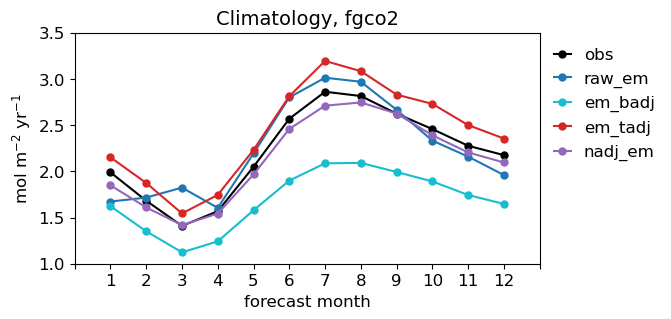

In [38]:
ds_list = [
         'obs',
         'raw_em',
         'em_badj',
         'em_tadj',
         # 'em_nadj',
         'nadj_em',
          ]

dict_to_show = {}
# dict_to_show_color = {}
for ds in ds_list:
    dict_to_show[ds] = dict_clim_glbavg[ds][var].sel(time=slice(0,11))
    # dict_to_show_color[ds] = color_dict_all[ds]
    
xlim_min = -1
xlim_max = 12
xticks_step = 1
    
file_out = f'ts_seasonal_cycle_climatology_{y0_show}-{y1_show}_{nadj_name}'
title = f'Climatology, {var}'
plot_ts_vs_lead(ds_list,        
              dict_to_show,
              color_dict=color_dict, #dict_to_show_color,
              ylim_min=bms_dict_plot[ibiome]['ts_clim_mean_ymin'],
              ylim_max=bms_dict_plot[ibiome]['ts_clim_mean_ymax'],
              xlim_min=xlim_min,
              xlim_max=xlim_max,
              xticks_step=xticks_step,
              xlabel='forecast month',
              ylabel=f'{units}',
              title=title,
              bbox=(.78,.5,.5,.5),
              fontsize=12,              
              dir_name=dir_out,
              file_name=file_out,
              show=True,
              save=True)

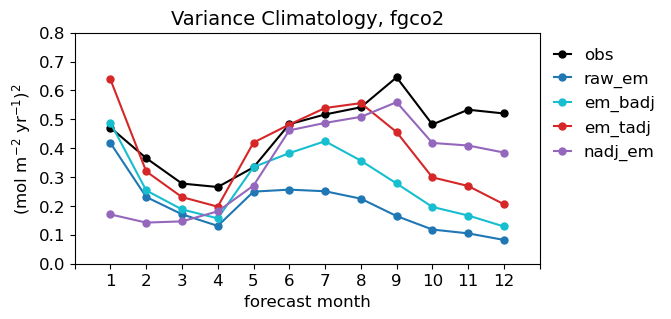

In [40]:
ds_list = [
         'obs',
         # 'raw_LE',
         'raw_em',
         'em_badj',
         'em_tadj',
         # 'em_nadj',
         'nadj_em',
          ]
dict_to_show = {}
for ds in ds_list:
    dict_to_show[ds] = dict_var_glbavg[ds][var].sel(time=slice(0,11))
    
xlim_min = -1
xlim_max = 12
xticks_step = 1

file_out = f'ts_seasonal_cycle_variance_{y0_show}-{y1_show}_{nadj_name}'
title = f'Variance Climatology, {var}'
plot_ts_vs_lead(ds_list,        
              dict_to_show,
              color_dict=color_dict, 
              ylim_min=bms_dict_plot[ibiome]['ts_clim_var_ymin'],
              ylim_max=bms_dict_plot[ibiome]['ts_clim_var_ymax'],
              xlim_min=xlim_min,
              xlim_max=xlim_max,
              xticks_step=xticks_step,
              xlabel='forecast month',
              ylabel=f'({units})$^2$',
              title=title,
              bbox=(.78,.5,.5,.5),
              fontsize=12,              
              dir_name=dir_out,
              file_name=file_out,
              show=True,
              save=True)

## Global Totals: Time Series ##

In [41]:

dict_em_ts = { 'obs'     : { 'ts'        : area_weighted_avg(dict_em_data['obs'],
                                                             integral=True)[var],
                             'color'     : obs_dict['color'],
                             'linestyle' : '-',
                            },
               'raw_em'  : { 'ts'        : area_weighted_avg(dict_em_data['raw_em'],
                                                             integral=True)[var],
                             'color'     : hnd_dict['color'],
                             'linestyle' : '-',
                           },
               'nadj_em' : { 'ts'        : area_weighted_avg(dict_em_data['nadj_em'],
                                                             integral=True)[var],
                             'color'     : nadj_dict['color'],
                             'linestyle' : '-',
                     },
               'em_badj' : { 'ts'        : area_weighted_avg(dict_em_data['em_badj'],
                                                             integral=True)[var],
                             'color'     : 'tab:orange', #badj_dict['color'],
                             'linestyle' : '-',
                     },
               'em_tadj' : { 'ts'        : area_weighted_avg(dict_em_data['em_tadj'],
                                                             integral=True)[var],
                             'color'     : tadj_dict['color'],
                             'linestyle' : '-',
                     },
               'em_nadj' : { 'ts'        : area_weighted_avg(dict_em_data['em_nadj'],
                                                             integral=True)[var],
                             'color'     : 'tab:green', #nadj_dict['color'],
                             'linestyle' : '-',
                     },
            }

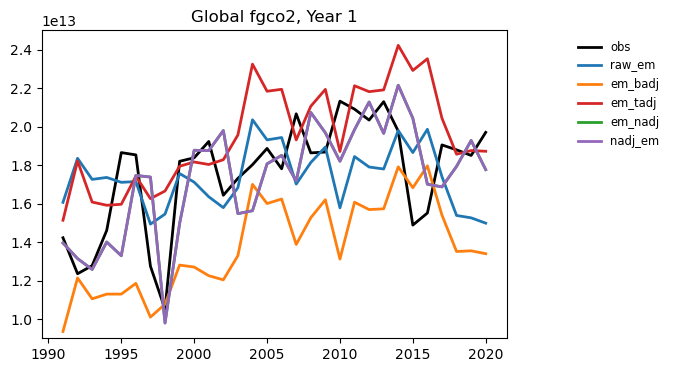

In [42]:
nldyr = 1 #3 #5
for ildyr in np.arange(nldyr):
    file_out = f'ts_glb_total_at_{ildyr+1}-year_lead_{nadj_name}'
    title = f'Global {var}, Year {ildyr+1}'
    ds_list = [
         'obs',
         'raw_em',
         'em_badj',
         'em_tadj',
         'em_nadj',
         'nadj_em',
        ]    
    plot_ts_glbavg_on_target(ds_list,
        dict_em_ts,
        ldyr=ildyr,
        figsize=(6,4),
        bbox=(.85,.5,.5,.5),
        linewidth=2,  
        axes_linewidth=2,
        ylim_min=bms_dict_plot[ibiome]['ts_total_ymin'],
        ylim_max=bms_dict_plot[ibiome]['ts_total_ymax'],
        title=title,
        dir_name=dir_out,
        file_name=file_out,
        show=True,
        save=False)        

## Global Total: Skill Measures ##

In [43]:
dict_data_ts_sliced = { 
                         'obs'    : dict_em_ts['obs']['ts'].sel(year=slice(y0_show,
                                                                           y1_show)),
                         'raw_em' : dict_em_ts['raw_em']['ts'].sel(year=slice(y0_show,
                                                                              y1_show)),
                         'em_badj': dict_em_ts['em_badj']['ts'].sel(year=slice(y0_show,
                                                                                y1_show)),                     
                         'em_tadj': dict_em_ts['em_tadj']['ts'].sel(year=slice(y0_show,
                                                                           y1_show)),                     
                         'em_nadj': dict_em_ts['em_nadj']['ts'].sel(year=slice(y0_show,
                                                                           y1_show)),
                         'nadj_em': dict_em_ts['nadj_em']['ts'].sel(year=slice(y0_show,
                                                                          y1_show))
                   } 

ds_list = [
           'raw_em',
           'em_badj',
           'em_tadj',
           'em_nadj',
           'nadj_em'
          ]

dict_ts_meas = { 
                  'rmse' : {},
                  'corr' : {},
                }

for ind, ds in enumerate(ds_list):
    ts_rmse = rmse(write_monthly_to_annual(dict_data_ts_sliced['obs'])/write_monthly_to_annual(dict_data_ts_sliced['obs']),
                        write_monthly_to_annual(dict_data_ts_sliced[ds])/write_monthly_to_annual(dict_data_ts_sliced['obs']))
    ts_corr = corr(write_monthly_to_annual(dict_data_ts_sliced['obs']),
                        write_monthly_to_annual(dict_data_ts_sliced[ds]))
        
    dict_ts_meas['rmse'][ds] = ts_rmse
    dict_ts_meas['corr'][ds] = ts_corr

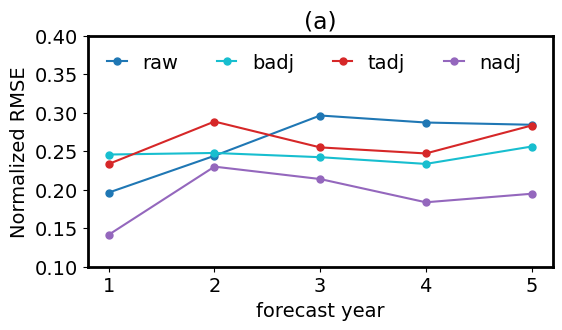

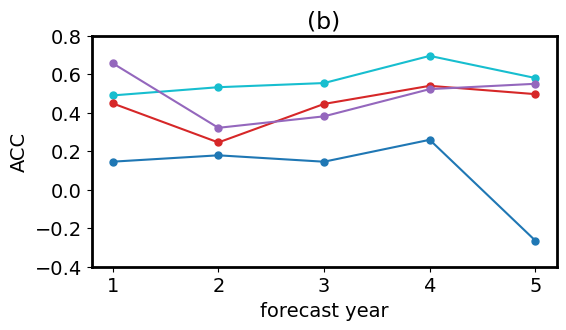

In [44]:
dict_plot_ts_meas = { 'rmse'         : {
                                      'title'    : '(a)',
                                      'ylabel'   : f'Normalized RMSE',
                                      'xlim_min' : -.2 ,
                                      'xlim_max' : 4.2,    
                                      'ylim_min' : bms_dict_plot[ibiome]['ts_total_rmse_ymin'],
                                      'ylim_max' : bms_dict_plot[ibiome]['ts_total_rmse_ymax'],
                                      'bbox'     : (.47,.5,.5,.5),
                                      'show_leg' : True
                                    },                 
                     'corr'         : {
                                      'title'    : '(b)',
                                      'ylabel'   : 'ACC',
                                      'xlim_min' : -.2 ,
                                      'xlim_max' : 4.2,    
                                      'ylim_min' : bms_dict_plot[ibiome]['ts_total_corr_ymin'],
                                      'ylim_max' : bms_dict_plot[ibiome]['ts_total_corr_ymax'],
                                      'bbox'     : (.06,.5,.5,.5),
                                      'show_leg' : False
                                    },
                 }

for imeas,meas in enumerate(['rmse',
                             'corr']):
    file_out = f'ts_total_{meas}_{y0_show}-{y1_show}_{nadj_name}'
    plot_ts_skill([
                   'raw_em',
                   'em_badj',
                   'em_tadj',
                   # 'em_nadj',
                   'nadj_em'
                  ],
                dict_ts_meas[meas],
                xlim_min=dict_plot_ts_meas[meas]['xlim_min'],
                xlim_max=dict_plot_ts_meas[meas]['xlim_max'],
                ylim_min=dict_plot_ts_meas[meas]['ylim_min'],
                ylim_max=dict_plot_ts_meas[meas]['ylim_max'],
                labels = ['raw',
                          'badj',
                          'tadj',
                          # 'nadj*',
                          'nadj'],
                xlabel='forecast year',
                ylabel=dict_plot_ts_meas[meas]['ylabel'],
                color_dict=color_dict, #dict_em_ts,
                title=dict_plot_ts_meas[meas]['title'],
                bbox=dict_plot_ts_meas[meas]['bbox'],
                show_leg=dict_plot_ts_meas[meas]['show_leg'],
                dir_name=dir_out,
                file_name=file_out,
                show=True,
                save=False) 

## Anomalies: Maps ##

In [45]:
show = False

dict_to_show = { 
                    'obs' : dict_anom_patt['obs'].sel(year=slice(y0_show,
                                                     y1_show)),
                    'raw_em' : dict_anom_patt['raw_em'].sel(year=slice(y0_show,
                                                     y1_show)),
                    'em_badj': dict_anom_patt['em_badj'].sel(year=slice(y0_show,
                                                     y1_show)),
                    'em_tadj': dict_anom_patt['em_tadj'].sel(year=slice(y0_show,
                                                     y1_show)),
                    'em_nadj': dict_anom_patt['em_nadj'].sel(year=slice(y0_show,
                                                     y1_show)),
                    'nadj_em': dict_anom_patt['nadj_em'].sel(year=slice(y0_show,
                                                     y1_show))
               }

ldyr_ini=1-1
ldyr_end=2-1
file_out = f'Maps_anom_pattern_ldyr_{ldyr_ini}-{ldyr_end}_{y0_show}-{y1_show}_{nadj_name}'

if show:
    plot_composites([
                 'raw_em',
                 'em_badj',
                 'em_tadj',
                 'em_nadj',
                 'nadj_em',
                 'obs'
                ],
                dict_to_show,                
                var,
                central_longitude=0,
                ldyr_ini=ldyr_ini,
                ldyr_end=ldyr_end,
                dir_name=dir_out,
                file_name=file_out,
                save=False)

In [46]:
show = False


dict_to_show = { 
                    'obs' : dict_anom['obs'].sel(year=slice(y0_show,
                                                            y1_show)),
                    'raw_em' : dict_anom['raw_em'].sel(year=slice(y0_show,
                                                            y1_show)),
                    'em_badj': dict_anom['em_badj'].sel(year=slice(y0_show,
                                                             y1_show)),
                    'em_tadj': dict_anom['em_tadj'].sel(year=slice(y0_show,
                                                             y1_show)),
                    'em_nadj': dict_anom['em_nadj'].sel(year=slice(y0_show,
                                                             y1_show)),
                    'nadj_em': dict_anom['nadj_em'].sel(year=slice(y0_show,
                                                             y1_show))
               }

ldyr_ini=1-1
ldyr_end=2-1
file_out = f'Maps_anom_base_{y0_base}-{y1_base}_ldyr_{ldyr_ini}-{ldyr_end}_{y0_show}-{y1_show}_{nadj_name}'

if show:
    plot_composites([
                 'raw_em',
                 'em_badj',
                 'em_tadj',
                 'em_nadj',
                 'nadj_em',
                 'obs'
                ],
                dict_to_show,                
                var,
                central_longitude=0,
                ldyr_ini=ldyr_ini,
                ldyr_end=ldyr_end,
                vmax=.2,
                vmin=-.2,
                dir_name=dir_out,
                file_name=file_out,
                save=False)

In [47]:
show = False


dict_to_show = { 
                    'obs' : dict_patt_residual['obs'].sel(year=slice(y0_show,
                                                            y1_show)),
                    'raw_em' : dict_patt_residual['raw_em'].sel(year=slice(y0_show,
                                                            y1_show)),
                    'em_badj': dict_patt_residual['em_badj'].sel(year=slice(y0_show,
                                                             y1_show)),
                    'em_tadj': dict_patt_residual['em_tadj'].sel(year=slice(y0_show,
                                                             y1_show)),
                    'em_nadj': dict_patt_residual['em_nadj'].sel(year=slice(y0_show,
                                                             y1_show)),
                    'nadj_em': dict_patt_residual['nadj_em'].sel(year=slice(y0_show,
                                                             y1_show))
               }

ldyr_ini=1-1
ldyr_end=2-1
file_out = f'Maps_anom_patt_residual_base_{y0_base}-{y1_base}_ldyr_{ldyr_ini}-{ldyr_end}_{y0_show}-{y1_show}_{nadj_name}'

if show:
    plot_composites([
                 'raw_em',
                 'em_badj',
                 'em_tadj',
                 'em_nadj',
                 'nadj_em',
                 'obs'
                ],
                dict_to_show,                
                var,
                central_longitude=0,
                ldyr_ini=ldyr_ini,
                ldyr_end=ldyr_end,
                vmax=.2,
                vmin=-.2,
                dir_name=dir_out,
                file_name=file_out,
                save=False)

## Skill Measures: Maps ##

In [48]:
show = False

list_measures = [
                'corr',
                'rmse'
               ]

dict_plt_meas = { 
                  'corr' : { 'vmin' : -.5,
                             'vmax' : .5,
                             'label': 'correlation',
                             'cmap' : 'RdBu_r'
                           },
                  'rmse' : { 'vmin' : 0,
                             'vmax' : 1.,
                             'label': 'rmse (mol m$^{-2}$ yr$^{-1}$)',
                             'cmap' : 'Reds_r'
                           },
                }

dict_to_show = { 'full' : { 
                            'obs'    : dict_em_data['obs'].sel(year=slice(y0_show,
                                                            y1_show)),
                            'raw_em' : dict_em_data['raw_em'].sel(year=slice(y0_show,
                                                            y1_show)),
                            'em_badj': dict_em_data['em_badj'].sel(year=slice(y0_show,
                                                             y1_show)),
                            'em_tadj': dict_em_data['em_tadj'].sel(year=slice(y0_show,
                                                             y1_show)),
                            'em_nadj': dict_em_data['em_nadj'].sel(year=slice(y0_show,
                                                             y1_show)),
                            'nadj_em': dict_em_data['nadj_em'].sel(year=slice(y0_show,
                                                             y1_show))
                          },
                 'anom' : { 
                            'obs'    : dict_anom['obs'].sel(year=slice(y0_show,
                                                            y1_show)),
                            'raw_em' : dict_anom['raw_em'].sel(year=slice(y0_show,
                                                            y1_show)),
                            'em_badj': dict_anom['em_badj'].sel(year=slice(y0_show,
                                                             y1_show)),
                            'em_tadj': dict_anom['em_tadj'].sel(year=slice(y0_show,
                                                             y1_show)),
                            'em_nadj': dict_anom['em_nadj'].sel(year=slice(y0_show,
                                                             y1_show)),
                            'nadj_em': dict_anom['nadj_em'].sel(year=slice(y0_show,
                                                             y1_show))
                          },
               }

stype = 'full'

if show:
    for ind, measure in enumerate(list_measures):
        ldyr_ini=1-1
        ldyr_end=2-1
        file_out = f'Maps_{list_measures[ind]}_{stype}_ldyr_{ldyr_ini}-{ldyr_end}_{y0_show}-{y1_show}_{nadj_name}'
        plot_measures([
                     'raw_em',
                     'em_badj',
                     'em_tadj',
                     'em_nadj',
                     'nadj_em',
                     # 'obs'
                      ],
                    dict_to_show[stype],                
                    var,
                    measure=measure,
                    central_longitude=0,
                    ldyr_ini=ldyr_ini,
                    ldyr_end=ldyr_end,
                    vmin=dict_plt_meas[measure]['vmin'],
                    vmax=dict_plt_meas[measure]['vmax'],
                    label=dict_plt_meas[measure]['label'],
                    cmap=dict_plt_meas[measure]['cmap'],
                    dir_name=dir_out,
                    file_name=file_out,
                    save=False)    

## Skill Measures: Averages ##

In [49]:
dict_data_sliced = { 'main'     :
                       {
                         'obs'    : dict_em_data['obs'].sel(year=slice(y0_show,
                                                                      y1_show)),
                         'raw_em' : dict_em_data['raw_em'].sel(year=slice(y0_show,
                                                                          y1_show)),
                         'em_badj': dict_em_data['em_badj'].sel(year=slice(y0_show,
                                                                           y1_show)),                     
                         'em_tadj': dict_em_data['em_tadj'].sel(year=slice(y0_show,
                                                                           y1_show)),                     
                         'em_nadj': dict_em_data['em_nadj'].sel(year=slice(y0_show,
                                                                           y1_show)),
                         'nadj_em': dict_em_data['nadj_em'].sel(year=slice(y0_show,
                                                                          y1_show))
                    },
                     'residual' : 
                       {
                         'obs'    : dict_patt_residual['obs'].sel(year=slice(y0_show,
                                                                             y1_show)),
                         'raw_em' : dict_patt_residual['raw_em'].sel(year=slice(y0_show,
                                                                                y1_show)),
                         'em_badj': dict_patt_residual['em_badj'].sel(year=slice(y0_show,
                                                                                 y1_show)),                     
                         'em_tadj': dict_patt_residual['em_tadj'].sel(year=slice(y0_show,
                                                                                 y1_show)),                     
                         'em_nadj': dict_patt_residual['em_nadj'].sel(year=slice(y0_show,
                                                                                 y1_show)),
                         'nadj_em': dict_patt_residual['nadj_em'].sel(year=slice(y0_show,
                                                                                 y1_show))
                    },
                   } 



ds_list = [
           'obs',
           'raw_em',
           'em_badj',
           'em_tadj',
           'em_nadj',
           'nadj_em'
          ]

dict_meas_avg = { 
                  'rmse' : {},
                  'corr' : {},
                  'corr_pat' : {},
                  'corr_pat_res' : {}
                }

roll_mean = False
ntime_roll = 12

for ind, ds in enumerate(ds_list):
    
    if roll_mean:
        rmse_ind = rmse(dict_data_sliced['main']['obs'].rolling(time=ntime_roll,
                                                                min_periods=ntime_roll,
                                                                center=True).mean('time'),
                        dict_data_sliced['main'][ds].rolling(time=ntime_roll,
                                                             min_periods=ntime_roll,
                                                             center=True).mean('time'))
        corr_ind = corr(dict_data_sliced['main']['obs'].rolling(time=ntime_roll,
                                                                min_periods=ntime_roll,
                                                                center=True).mean('time'),
                        dict_data_sliced['main'][ds].rolling(time=ntime_roll,
                                                             min_periods=ntime_roll,
                                                             center=True).mean('time'))
        corr_pat_ind = corr_map(dict_data_sliced['main']['obs'].rolling(time=ntime_roll,
                                                                        min_periods=ntime_roll,
                                                                        center=True).mean('time'),
                                dict_data_sliced['main'][ds].rolling(time=ntime_roll,
                                                                     min_periods=ntime_roll,
                                                                     center=True).mean('time'))    
        corr_pat_res_ind = corr(dict_data_sliced['residual']['obs'].rolling(time=ntime_roll,
                                                                            min_periods=ntime_roll,
                                                                            center=True).mean('time'),
                                dict_data_sliced['residual'][ds].rolling(time=ntime_roll,
                                                                         min_periods=ntime_roll,
                                                                         center=True).mean('time')) 
        
    if not roll_mean:
        rmse_ind = rmse(write_monthly_to_annual(dict_data_sliced['main']['obs']),
                        write_monthly_to_annual(dict_data_sliced['main'][ds]))
        corr_ind = corr(write_monthly_to_annual(dict_data_sliced['main']['obs']),
                        write_monthly_to_annual(dict_data_sliced['main'][ds]))
        corr_pat_ind = corr_map(write_monthly_to_annual(dict_data_sliced['main']['obs']),
                                write_monthly_to_annual(dict_data_sliced['main'][ds]))    
        corr_pat_res_ind = corr(write_monthly_to_annual(dict_data_sliced['residual']['obs']),
                                write_monthly_to_annual(dict_data_sliced['residual'][ds])) 
        
    rmse_ind_glbavg = area_weighted_avg(rmse_ind[var],
                                        mask=mask_ocean,
                                        is_ds=False).values
    
    corr_ind_glbavg = area_weighted_avg(corr_ind[var],
                                        mask=mask_ocean,
                                        is_ds=False).values
    
    corr_pat_ind_avg = corr_pat_ind[var].mean('year').values
        
    corr_pat_res_ind_glbavg = area_weighted_avg(corr_pat_res_ind[var],
                                                mask=mask_ocean,
                                                is_ds=False).values

    

    dict_meas_avg['rmse'][ds]     = rmse_ind_glbavg
    dict_meas_avg['corr'][ds]     = corr_ind_glbavg
    dict_meas_avg['corr_pat'][ds] = corr_pat_ind_avg
    dict_meas_avg['corr_pat_res'][ds] = corr_pat_res_ind_glbavg

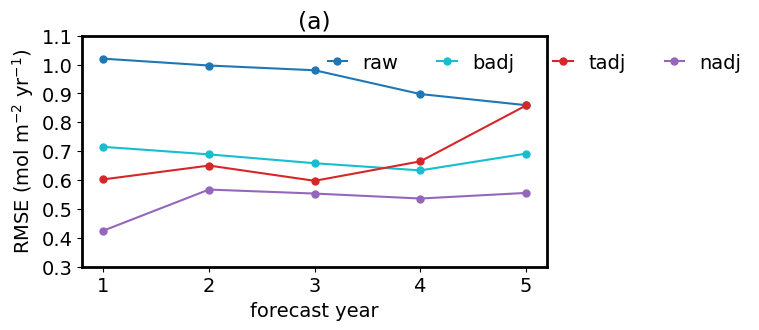

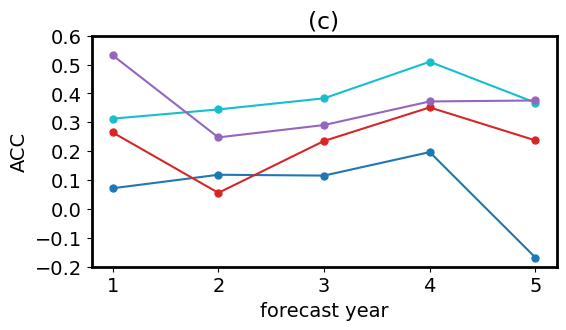

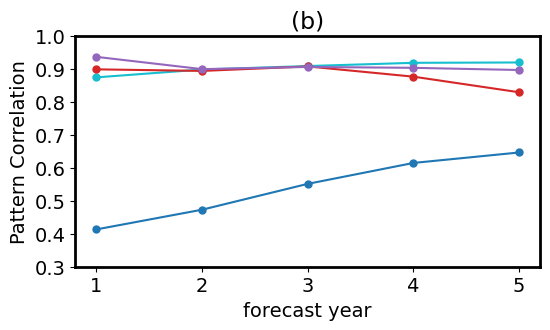

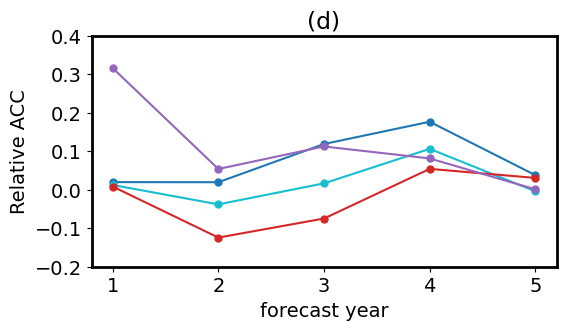

In [50]:
dict_plot_meas = { 'rmse'         : { 
                                      'title'    : '(a)',
                                      'ylabel'   : f'RMSE ({units})',
                                      'xlim_min' : -.2 ,
                                      'xlim_max' : 4.2, 
                                      'ylim_min' : bms_dict_plot[ibiome]['ts_rmse_avg_ymin'],
                                      'ylim_max' : bms_dict_plot[ibiome]['ts_rmse_avg_ymax'],
                                      'bbox'     : (.49,.5,.5,.5),
                                      'show_leg' : True
                                    },                 
                   'corr'         : {
                                      'title'    : '(c)',
                                      'ylabel'   : 'ACC',
                                      'xlim_min' : -.2 ,
                                      'xlim_max' : 4.2,    
                                      'ylim_min' : bms_dict_plot[ibiome]['ts_corr_avg_ymin'],
                                      'ylim_max' : bms_dict_plot[ibiome]['ts_corr_avg_ymax'],
                                      'bbox'     : (.06,.5,.5,.5),
                                      'show_leg' : False
                                    },
                   'corr_pat'     : { 
                                      'title'    : '(b)',
                                      'ylabel'   : 'Pattern Correlation',
                                      'xlim_min' : -.2 ,
                                      'xlim_max' : 4.2,    
                                      'ylim_min' : bms_dict_plot[ibiome]['ts_corr_pat_avg_ymin'],
                                      'ylim_max' : bms_dict_plot[ibiome]['ts_corr_pat_avg_ymax'],
                                      'bbox'     : (.1,.5,.5,.5),
                                      'show_leg' : False
                                    },
                   'corr_pat_res' : { 
                                      'title'    : '(d)',
                                      'ylabel'   : 'Relative ACC',
                                      'xlim_min' : -.2,
                                      'xlim_max' : 4.2,    
                                      'ylim_min' : bms_dict_plot[ibiome]['ts_corr_pat_res_avg_ymin'],
                                      'ylim_max' : bms_dict_plot[ibiome]['ts_corr_pat_res_avg_ymax'],
                                      'bbox'     : (.1,.5,.5,.5),
                                      'show_leg' : False
                                },
                 }

for imeas,meas in enumerate(['rmse',
                             'corr',
                             'corr_pat',
                             'corr_pat_res']):
    file_out = f'ts_{meas}_glbavg_{y0_show}-{y1_show}_{nadj_name}'
    plot_ts_skill([
                   'raw_em',
                   'em_badj',
                   'em_tadj',
                   # 'em_nadj',
                   'nadj_em'
                  ],
                dict_meas_avg[meas],
                xlim_min=dict_plot_meas[meas]['xlim_min'],
                xlim_max=dict_plot_meas[meas]['xlim_max'],
                ylim_min=dict_plot_meas[meas]['ylim_min'],
                ylim_max=dict_plot_meas[meas]['ylim_max'],
                labels = ['raw',
                          'badj',
                          'tadj',
                          # 'nadj*',
                          'nadj'],
                xlabel='forecast year',
                ylabel=dict_plot_meas[meas]['ylabel'],
                color_dict=color_dict, #dict_em_ts,
                title=dict_plot_meas[meas]['title'],
                bbox=dict_plot_meas[meas]['bbox'],
                show_leg=dict_plot_meas[meas]['show_leg'],
                dir_name=dir_out,
                file_name=file_out,
                show=True,
                save=False) 

## Annual Mean Anomalies: Maps ## 

In [51]:
list_ds = [
           'obs',
           'raw_em',
           'em_badj',
           'em_tadj',
           'em_nadj',
           'nadj_em',
           ]   
list_ds_type = [
               'full',
               'anom',
               'patt',
               'resd'
               ]
list_meas = [
                'corr',
                'rmse',
               ]

dict_am = {}
dict_am_measures = {}
for ds in list_ds:
    dict_am[ds] = {}
    dict_am_measures[ds] = {}
    for ds_type in list_ds_type:
        if ds_type == 'full':
            data_ds_type = dict_em_data[ds] 
        if ds_type == 'anom':
            data_ds_type = dict_anom[ds] 
        if ds_type == 'patt':
            data_ds_type = dict_anom_patt[ds] 
        if ds_type == 'resd':
            data_ds_type = dict_patt_residual[ds] 
        dict_am[ds][ds_type] = {} 
        dict_am[ds][ds_type] = write_monthly_to_annual(data_ds_type).sel(year=slice(y0_show,
                                                                                    y1_show))
        dict_am_measures[ds][ds_type] = {} 
        dict_am_measures[ds][ds_type]['corr'] = corr(dict_am['obs'][ds_type],
                                                dict_am[ds][ds_type])
        dict_am_measures[ds][ds_type]['rmse'] = rmse(dict_am['obs'][ds_type],
                                                dict_am[ds][ds_type])

In [52]:
list_ds = [
           'obs',
           'raw_em',
           'em_badj',
           'em_tadj',
           'em_nadj',
           'nadj_em'
          ]

time_to_show = [0,2,4] 

cbar = False
 
for ind, ds in enumerate(list_ds):
    
    if ind == len(list_ds)-1:
        cbar = True
                
    titles = f'{ds}'
    cbar_label = r'mol m$^{-2}$ yr$^{-1}$'
    
    file_out = f'map_anom_patt_{ds}_base_{y0_base}-{y1_base}_ana_{y0_show}-{y1_show}_{nadj_name}'
    
    plot_maps(dict_am[ds]['patt'][var].mean('year').sel(time=time_to_show),
              titles=titles, 
              cbar=cbar,
              cbar_label=cbar_label,
              central_longitude=0,
              vmax=2,
              vmin=-2,
              fig_dir=dir_out,
              fig_name=file_out,
              show=False,
              save=False)             

In [ ]:
list_ds = [
           'obs',
           'raw_em',
           'em_badj',
           'em_tadj',
           'em_nadj',
           'nadj_em',
          ]

time_to_show = [0,2,4] 

cbar = False
    
for ind, ds in enumerate(list_ds):
        
    if ind == len(list_ds)-1:
        cbar = True
                
    titles = f'{ds}'
    cbar_label = r'mol m$^{-2}$ yr$^{-1}$'
    
    file_out = f'map_anom_{ds}_base_{y0_base}-{y1_base}_ana_{y0_show}-{y1_show}_{nadj_name}'

    plot_maps(dict_am[ds]['anom'][var].mean('year').sel(time=time_to_show),
              titles=titles, 
              cbar=cbar,
              cbar_label=cbar_label,
              central_longitude=0,
              vmax=.2,
              vmin=-.2,
              fig_dir=dir_out,
              fig_name=file_out,
              show=True,
              save=False)             

In [54]:
list_ds = [
           'obs',
           'raw_em',
           'em_badj',
           'em_tadj',
           'em_nadj',
           'nadj_em'
          ]

time_to_show = [0,2,4] 

cbar = False
    
 
for ind, ds in enumerate(list_ds):
    
    if ind == len(list_ds)-1:
        cbar = True
                
    titles = f'{ds}'
    cbar_label = r'mol m$^{-2}$ yr$^{-1}$'
    
    file_out = f'map_anom_patt_residual_{ds}_base_{y0_base}-{y1_base}_ana_{y0_show}-{y1_show}_{nadj_name}'
    
    plot_maps(dict_am[ds]['resd'][var].mean('year').sel(time=time_to_show),
              titles=titles, 
              cbar=cbar,
              cbar_label=cbar_label,
              central_longitude=0,
              vmax=.5,
              vmin=-.5,
              fig_dir=dir_out,
              fig_name=file_out,
              show=False,
              save=False)             

## Annual Mean Skill: Maps ##

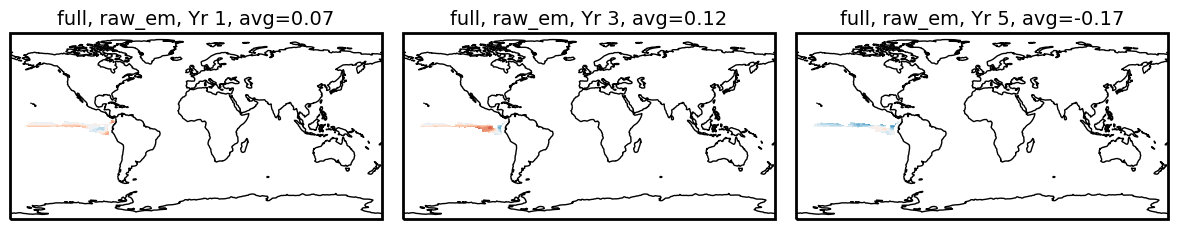

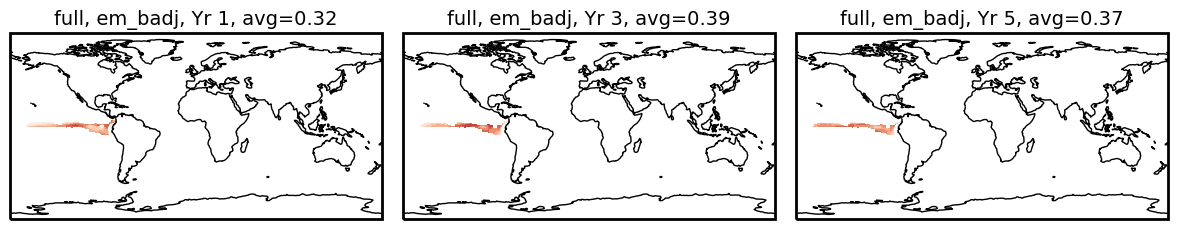

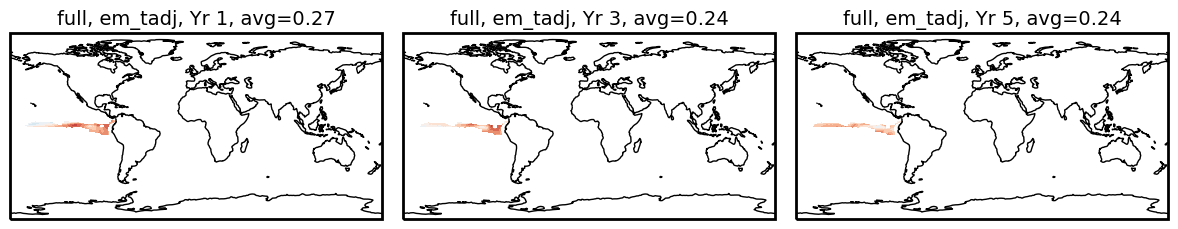

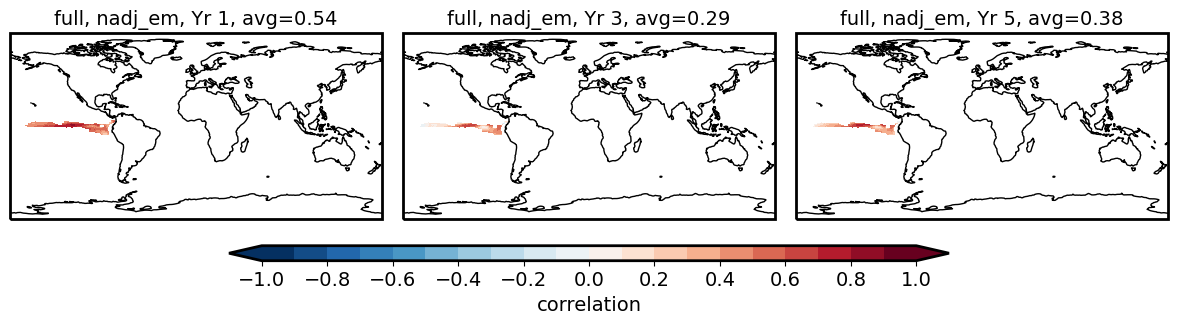

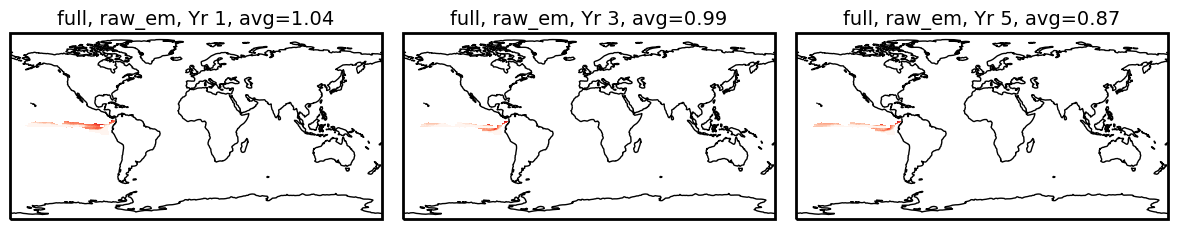

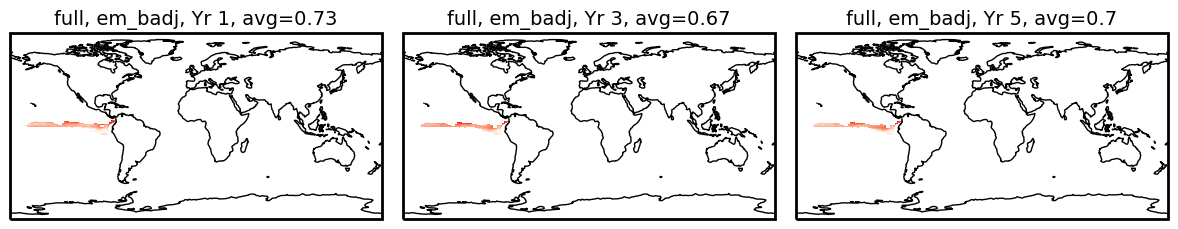

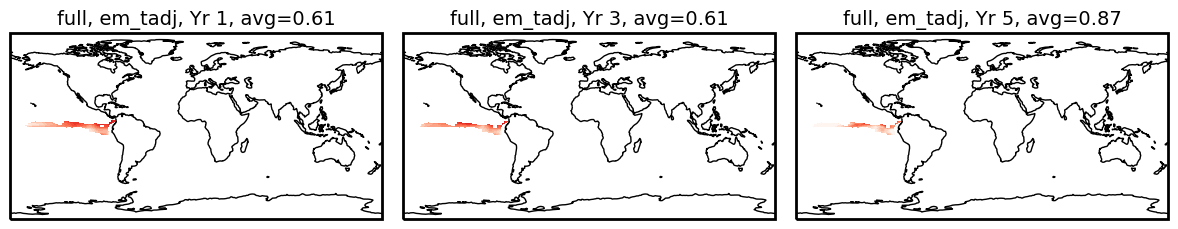

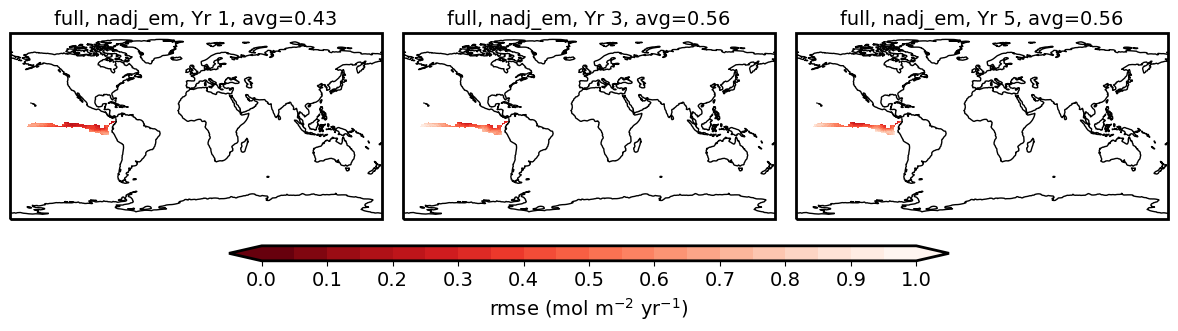

In [56]:
dict_plt_meas = { 
                  'corr' : {
                             'vmin' : {
                                        'full' : -1.,
                                        'anom' : -1.,
                                        'patt' : -1.,
                                        'resd' : -1.,
                                       },
                             'vmax' : {
                                        'full' : 1.,
                                        'anom' : 1.,
                                        'patt' : 1.,
                                        'resd' : 1.,
                                       },
                             'label': 'correlation',
                             'cmap' : 'RdBu_r'
                           },
                  'rmse' : { 
                            'vmin' : {
                                        'full' : 0.,
                                        'anom' : 0.,
                                        'patt' : 0.,
                                        'resd' : 0.,
                                       },
                             'vmax' : {
                                        'full' : 1.,
                                        'anom' : 1.,
                                        'patt' : 1.,
                                        'resd' : 1.,
                                       },
                             'label': 'rmse (mol m$^{-2}$ yr$^{-1}$)',
                             'cmap' : 'Reds_r'
                           },
                }

list_ds = [
           'raw_em',
           'em_badj',
           'em_tadj',
           # 'em_nadj',
           'nadj_em',
           # 'obs'
          ]
list_ds_type = [
               'full',
               # 'anom',
               # 'patt'
            #    'resd'
               ]
list_meas = [
                'corr',
                'rmse',
               ]


time_to_show = [0,2,4] 



for meas in list_meas:

        
    for ds_type in list_ds_type:
            
        cbar = False
            
        for ds in list_ds:
                
            if ds == list_ds[-1]:
                cbar = True
                    
            ds_meas = dict_am_measures[ds][ds_type][meas][var]
        
            titles = f'{ds_type}, {ds}'
            cbar_label = dict_plt_meas[meas]['label']
    
            file_out = f'map_{meas}_{ds_type}_{ds}_am_{y0_show}-{y1_show}_{nadj_name}'
        
            if ds_type == 'anom':
                file_out = f'map_{meas}_{ds_type}_{ds}_base_{y0_base}-{y1_base}_am_{y0_show}-{y1_show}_{nadj_name}'
    
        
            plot_maps(ds_meas.sel(time=time_to_show),
                      titles=titles, 
                      cbar=cbar,
                      cbar_label=cbar_label,
                      central_longitude=0,
                      cmap=dict_plt_meas[meas]['cmap'], 
                      vmin=dict_plt_meas[meas]['vmin'][ds_type],
                      vmax=dict_plt_meas[meas]['vmax'][ds_type],
                      nvals=20,
                      fig_dir=dir_out,
                      fig_name=file_out,
                      show=True,
                      save=False)             